### Combine the ocean dynamic, wind effect and regional steric sea level from many outputs

Reanalysis data: GLORYS, SODA, ORA
ROMS output from these reanalysis datasets
Dewi's budget

For a polygon area based on altimetry data (absolute sea level) and near the six tide gauges (relative sea level)

In [227]:
import xarray as xr
import pandas as pd
import numpy as np

from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

path_fig = '/Users/iriskeizer/Documents/ROMS/figures/GLORYS/comparison'

# Sea level near tide gauges

## Import data

In [228]:
glorys_tg_ocdyn = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/tg_ocdyn/glorys_tg_ocdyn.csv', index_col = 'time')['Average'].values*100
glorys_tg_wind = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/wind effect/timeseries_glorys.nc').sel(station = 'Average').wind_total.values*100

# Obtain anomalies compared to 1993
glorys_tg_ocdyn = glorys_tg_ocdyn - glorys_tg_ocdyn[0]
glorys_tg_wind = glorys_tg_wind - glorys_tg_wind[0]

# Obtain steric
glorys_tg_steric = glorys_tg_ocdyn - glorys_tg_wind

glorys_tg_time = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/tg_ocdyn/glorys_tg_ocdyn.csv', index_col = 'time').index.values

In [229]:
roms_glorys_tg_ocdyn = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/tg_ocdyn/roms_glorys_tg_ocdyn.csv', index_col = 'time')['Average'].values*100
roms_glorys_tg_wind = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/wind effect/timeseries_glorys.nc').sel(station = 'Average').wind_total.values*100

# Obtain anomalies compared to 1993
roms_glorys_tg_ocdyn = roms_glorys_tg_ocdyn - roms_glorys_tg_ocdyn[0]
roms_glorys_tg_wind = roms_glorys_tg_wind - roms_glorys_tg_wind[0]

# Obtain steric
roms_glorys_tg_steric = roms_glorys_tg_ocdyn - roms_glorys_tg_wind

roms_glorys_tg_time = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/tg_ocdyn/roms_glorys_tg_ocdyn.csv', index_col = 'time').index.values

In [230]:
soda_tg_ocdyn = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/tg_ocdyn/sealevel_soda_tg.csv', index_col = 'time')['Average'].values*100
soda_tg_wind = xr.open_dataset('/Users/iriskeizer/Documents/Zeespiegelscenarios/data/soda/regression output/timeseries_soda.nc').sel(station = 'Average').wind_total.values*100

# Obtain anomalies compared to 1993
soda_tg_ocdyn = soda_tg_ocdyn - soda_tg_ocdyn[13]
soda_tg_wind = soda_tg_wind - soda_tg_wind[13]

# Obtain steric
soda_tg_steric = soda_tg_ocdyn - soda_tg_wind

soda_tg_time = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/tg_ocdyn/sealevel_soda_tg.csv', index_col = 'time').index.values

In [231]:
roms_soda_tg_ocdyn = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/tg_ocdyn/sealevel_soda_tg.csv', index_col = 'time')['Average'].values*100
roms_soda_tg_wind = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/wind effect/timeseries_soda.nc').sel(station = 'Average').wind_total.values*100

# Obtain anomalies compared to 1993
roms_soda_tg_ocdyn = roms_soda_tg_ocdyn - roms_soda_tg_ocdyn[13]
roms_soda_tg_wind = roms_soda_tg_wind - roms_soda_tg_wind[13]

# Obtain steric
roms_soda_tg_steric = roms_soda_tg_ocdyn - roms_soda_tg_wind

roms_soda_tg_time = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/tg_ocdyn/sealevel_soda_tg.csv', index_col = 'time').index.values

In [232]:
budget_tg = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/budget/slbudget_2022_11_23_All_NL_tide_gauge_1993_2021_ERA5_StericEN4_22_[500, 4000]m.csv', index_col = 'time')

In [233]:
budget_tg_wind = budget_tg['Wind'].values - budget_tg['Wind'].iloc[0]
budget_tg_steric = budget_tg['LocSteric'].values - budget_tg['LocSteric'].iloc[0]
budget_tg_ocdyn = budget_tg_wind + budget_tg_steric

budget_tg_time = budget_tg.index.values

## Recover observations

In [252]:
budget_tg_tot = budget_tg['Total'].values - budget_tg['Total'][1993]
budget_tg_obs = budget_tg['Obs'].values - budget_tg['Obs'][1993]

glorys_tg_obs = budget_tg_tot[:-1] - budget_tg_ocdyn[:-1] + glorys_tg_ocdyn
roms_glorys_tg_obs = budget_tg_tot[:-1] - budget_tg_ocdyn[:-1] + roms_glorys_tg_ocdyn
soda_tg_obs = budget_tg_tot[:-1] - budget_tg_ocdyn[:-1] + soda_tg_ocdyn[13:]
roms_soda_tg_obs = budget_tg_tot[:-1] - budget_tg_ocdyn[:-1] + roms_soda_tg_ocdyn[13:]

## Plot results

### Ocean dynamic sea level including linear trends and correlation for detrended time series

In this figure I should plot:

glorys, roms_glorys, soda, roms_soda, budget

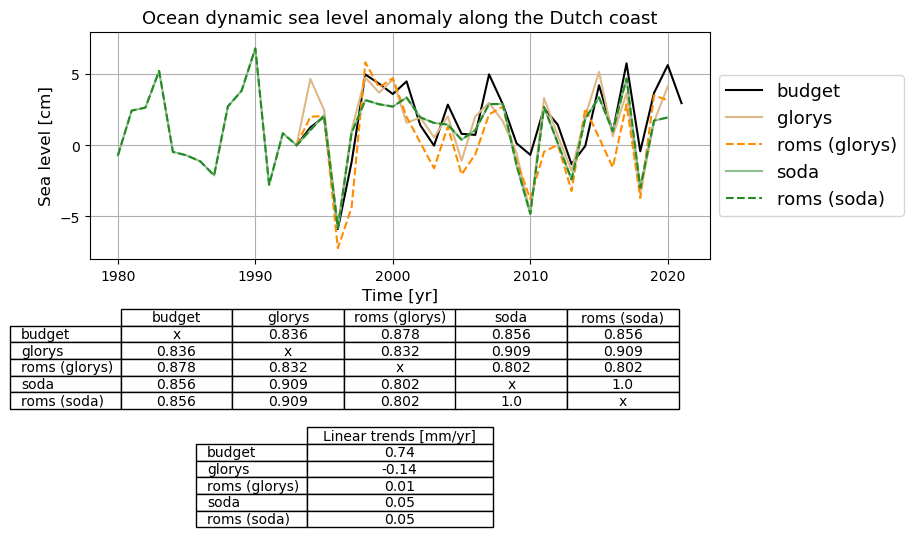

In [235]:
fig, axes = plt.subplots(2,1, figsize = (8,6.5))

ax = axes[0]

# Plot budget
ax.plot(budget_tg_time, budget_tg_ocdyn, color = 'k')

# Plot glorys output
ax.plot(glorys_tg_time, glorys_tg_ocdyn, color = 'burlywood')
ax.plot(roms_glorys_tg_time, roms_glorys_tg_ocdyn, '--', color = 'darkorange')


# Plot soda output
ax.plot(soda_tg_time, soda_tg_ocdyn, color = 'darkseagreen')
ax.plot(roms_soda_tg_time, roms_soda_tg_ocdyn, '--', color = 'forestgreen')


# Obtain linear trend
budget_trend = round(np.polyfit(budget_tg_time[:-1], budget_tg_ocdyn[:-1]*10, 1)[0],2)
glorys_trend = round(np.polyfit(glorys_tg_time, glorys_tg_ocdyn*10, 1)[0],2)
roms_glorys_trend = round(np.polyfit(roms_glorys_tg_time, roms_glorys_tg_ocdyn*10, 1)[0],2)
soda_trend = round(np.polyfit(soda_tg_time[13:], soda_tg_ocdyn[13:]*10, 1)[0],2)
roms_soda_trend = round(np.polyfit(roms_soda_tg_time[13:], roms_soda_tg_ocdyn[13:]*10, 1)[0],2)

#ax.text(1980.1, -14, f'Linear trends (mm/yr):\nbudget = {budget_trend}\nglorys = {glorys_trend}\nroms (glorys) = {roms_glorys_trend}\nsoda = {soda_trend}\nroms (soda) = {roms_soda_trend}')


    
# Add plot settings  
ax.set_xlabel('Time [yr]', fontsize = 12)
ax.set_ylabel('Sea level [cm]', fontsize = 12)
ax.set_title(f'Ocean dynamic sea level anomaly along the Dutch coast', fontsize = 13)
ax.set_xticks(range(1980, 2021, 10), fontsize = 12)
ax.set_ylim(-8,8)
ax.set_yticks([-5, 0, 5], fontsize = 12)
ax.grid()

# Add label
labels=['budget', 'glorys','roms (glorys)', 'soda', 'roms (soda)']
ax.legend(labels = labels, fontsize = 13, loc='center left', bbox_to_anchor=(1.0, 0.5))



# Detrend data
budget_dt = signal.detrend(budget_tg_ocdyn[:-1])
glorys_dt = signal.detrend(glorys_tg_ocdyn)
roms_glorys_dt = signal.detrend(roms_glorys_tg_ocdyn)
soda_dt = signal.detrend(soda_tg_ocdyn[13:])
roms_soda_dt = signal.detrend(roms_soda_tg_ocdyn[13:])


# Obtain correlations
r_glorys_budget = np.round(np.corrcoef(glorys_dt, budget_dt)[0,1], 3)
r_roms_glorys_budget = np.round(np.corrcoef(roms_glorys_dt, budget_dt)[0,1], 3)
r_soda_budget = np.round(np.corrcoef(soda_dt, budget_dt)[0,1], 3)
r_roms_soda_budget = np.round(np.corrcoef(roms_soda_dt, budget_dt)[0,1], 3)

r_roms_glorys_glorys = np.round(np.corrcoef(roms_glorys_dt, glorys_dt)[0,1], 3)
r_soda_glorys = np.round(np.corrcoef(soda_dt, glorys_dt)[0,1], 3)
r_roms_soda_glorys = np.round(np.corrcoef(roms_soda_dt, glorys_dt)[0,1], 3)

r_soda_roms_glorys = np.round(np.corrcoef(soda_dt, roms_glorys_dt)[0,1], 3)
r_roms_soda_roms_glorys = np.round(np.corrcoef(roms_soda_dt, roms_glorys_dt)[0,1], 3)

r_roms_soda_soda = np.round(np.corrcoef(roms_soda_dt, soda_dt)[0,1], 3)

# Make table of correlations
table_labels=['budget','glorys','roms (glorys)', 'soda', 'roms (soda)']
table_vals=[['x',r_glorys_budget,r_roms_glorys_budget,r_soda_budget,r_roms_soda_budget],
            [r_glorys_budget,'x',r_roms_glorys_glorys,r_soda_glorys,r_roms_soda_glorys],
            [r_roms_glorys_budget,r_roms_glorys_glorys,'x',r_soda_roms_glorys,r_roms_soda_roms_glorys],
            [r_soda_budget,r_soda_glorys,r_soda_roms_glorys,'x',r_roms_soda_soda],
            [r_roms_soda_budget,r_roms_soda_glorys,r_roms_soda_roms_glorys,r_roms_soda_soda,'x']]

axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
plt.box(on=None)
the_table = axes[1].table(cellText=table_vals,
                  colWidths = [0.18]*5,
                  cellLoc = 'center',
                  rowLabels=table_labels,
                  colLabels=table_labels,
                         loc = 'upper center')

# Make table of linear trends
the_secon_table = axes[1].table(cellText=[[str(budget_trend)], [str(glorys_trend)], [str(roms_glorys_trend)], [str(soda_trend)], [str(roms_soda_trend)]],
                  colWidths = [0.3]*5,
                  cellLoc = 'center',
                  rowLabels=table_labels,
                  colLabels=['Linear trends [mm/yr]'],
                         loc = 'lower center')


    
plt.savefig(f'{path_fig}/ocdyn_sealevel_tg', bbox_inches="tight")

### Wind-driven sea level including linear trends and correlation for detrended time series

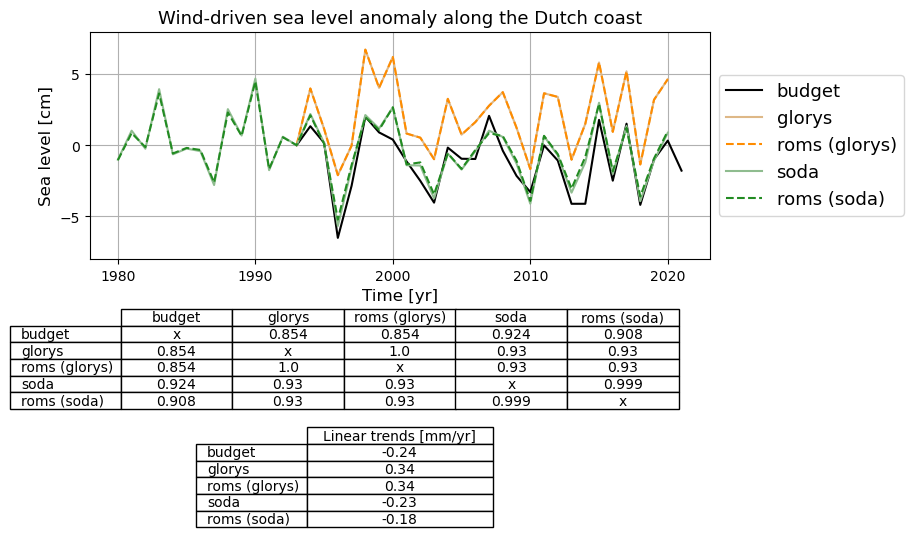

In [236]:
fig, axes = plt.subplots(2,1, figsize = (8,6.5))

ax = axes[0]

# Plot budget
ax.plot(budget_tg_time, budget_tg_wind, color = 'k')

# Plot glorys output
ax.plot(glorys_tg_time, glorys_tg_wind, color = 'burlywood')
ax.plot(roms_glorys_tg_time, roms_glorys_tg_wind, '--', color = 'darkorange')


# Plot soda output
ax.plot(soda_tg_time, soda_tg_wind, color = 'darkseagreen')
ax.plot(roms_soda_tg_time, roms_soda_tg_wind, '--', color = 'forestgreen')


# Obtain linear trend
budget_trend = round(np.polyfit(budget_tg_time[:-1], budget_tg_wind[:-1]*10, 1)[0],2)
glorys_trend = round(np.polyfit(glorys_tg_time, glorys_tg_wind*10, 1)[0],2)
roms_glorys_trend = round(np.polyfit(roms_glorys_tg_time, roms_glorys_tg_wind*10, 1)[0],2)
soda_trend = round(np.polyfit(soda_tg_time[13:], soda_tg_wind[13:]*10, 1)[0],2)
roms_soda_trend = round(np.polyfit(roms_soda_tg_time[13:], roms_soda_tg_wind[13:]*10, 1)[0],2)

#ax.text(1980.1, -14, f'Linear trends (mm/yr):\nbudget = {budget_trend}\nglorys = {glorys_trend}\nroms (glorys) = {roms_glorys_trend}\nsoda = {soda_trend}\nroms (soda) = {roms_soda_trend}')


    
# Add plot settings  
ax.set_xlabel('Time [yr]', fontsize = 12)
ax.set_ylabel('Sea level [cm]', fontsize = 12)
ax.set_title(f'Wind-driven sea level anomaly along the Dutch coast', fontsize = 13)
ax.set_xticks(range(1980, 2021, 10), fontsize = 12)
ax.set_ylim(-8,8)
ax.set_yticks([-5, 0, 5], fontsize = 12)
ax.grid()

# Add label
labels=['budget', 'glorys','roms (glorys)', 'soda', 'roms (soda)']
ax.legend(labels = labels, fontsize = 13, loc='center left', bbox_to_anchor=(1.0, 0.5))



# Detrend data
budget_dt = signal.detrend(budget_tg_wind[:-1])
glorys_dt = signal.detrend(glorys_tg_wind)
roms_glorys_dt = signal.detrend(roms_glorys_tg_wind)
soda_dt = signal.detrend(soda_tg_wind[13:])
roms_soda_dt = signal.detrend(roms_soda_tg_wind[13:])


# Obtain correlations
r_glorys_budget = np.round(np.corrcoef(glorys_dt, budget_dt)[0,1], 3)
r_roms_glorys_budget = np.round(np.corrcoef(roms_glorys_dt, budget_dt)[0,1], 3)
r_soda_budget = np.round(np.corrcoef(soda_dt, budget_dt)[0,1], 3)
r_roms_soda_budget = np.round(np.corrcoef(roms_soda_dt, budget_dt)[0,1], 3)

r_roms_glorys_glorys = np.round(np.corrcoef(roms_glorys_dt, glorys_dt)[0,1], 3)
r_soda_glorys = np.round(np.corrcoef(soda_dt, glorys_dt)[0,1], 3)
r_roms_soda_glorys = np.round(np.corrcoef(roms_soda_dt, glorys_dt)[0,1], 3)

r_soda_roms_glorys = np.round(np.corrcoef(soda_dt, roms_glorys_dt)[0,1], 3)
r_roms_soda_roms_glorys = np.round(np.corrcoef(roms_soda_dt, roms_glorys_dt)[0,1], 3)

r_roms_soda_soda = np.round(np.corrcoef(roms_soda_dt, soda_dt)[0,1], 3)

# Make table of correlations
table_labels=['budget','glorys','roms (glorys)', 'soda', 'roms (soda)']
table_vals=[['x',r_glorys_budget,r_roms_glorys_budget,r_soda_budget,r_roms_soda_budget],
            [r_glorys_budget,'x',r_roms_glorys_glorys,r_soda_glorys,r_roms_soda_glorys],
            [r_roms_glorys_budget,r_roms_glorys_glorys,'x',r_soda_roms_glorys,r_roms_soda_roms_glorys],
            [r_soda_budget,r_soda_glorys,r_soda_roms_glorys,'x',r_roms_soda_soda],
            [r_roms_soda_budget,r_roms_soda_glorys,r_roms_soda_roms_glorys,r_roms_soda_soda,'x']]

axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
plt.box(on=None)
the_table = axes[1].table(cellText=table_vals,
                  colWidths = [0.18]*5,
                  cellLoc = 'center',
                  rowLabels=table_labels,
                  colLabels=table_labels,
                         loc = 'upper center')

# Make table of linear trends
the_secon_table = axes[1].table(cellText=[[str(budget_trend)], [str(glorys_trend)], [str(roms_glorys_trend)], [str(soda_trend)], [str(roms_soda_trend)]],
                  colWidths = [0.3]*5,
                  cellLoc = 'center',
                  rowLabels=table_labels,
                  colLabels=['Linear trends [mm/yr]'],
                         loc = 'lower center')


    
plt.savefig(f'{path_fig}/wind_sealevel_tg', bbox_inches="tight")

### Regional steric sea level including linear trends and correlation for detrended time series

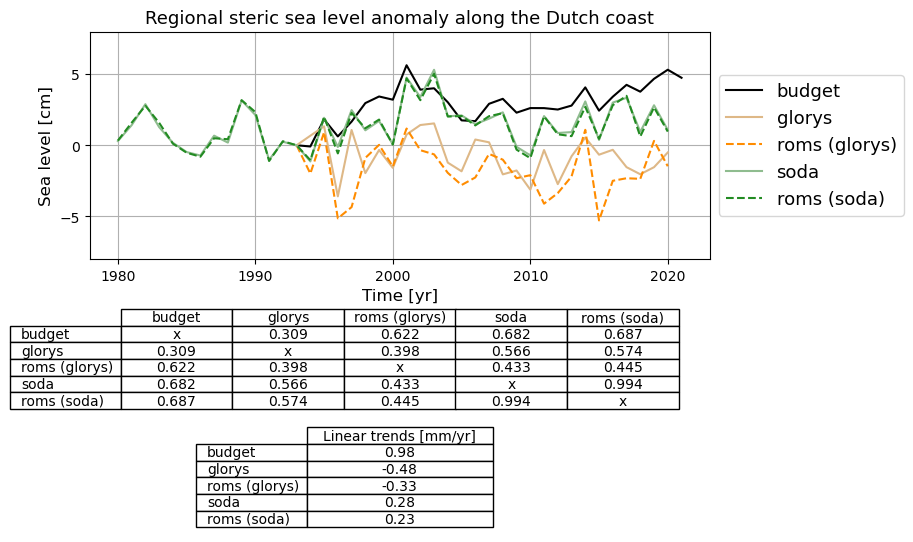

In [237]:
fig, axes = plt.subplots(2,1, figsize = (8,6.5))

ax = axes[0]

# Plot budget
ax.plot(budget_tg_time, budget_tg_steric, color = 'k')

# Plot glorys output
ax.plot(glorys_tg_time, glorys_tg_steric, color = 'burlywood')
ax.plot(roms_glorys_tg_time, roms_glorys_tg_steric, '--', color = 'darkorange')


# Plot soda output
ax.plot(soda_tg_time, soda_tg_steric, color = 'darkseagreen')
ax.plot(roms_soda_tg_time, roms_soda_tg_steric, '--', color = 'forestgreen')


# Obtain linear trend
budget_trend = round(np.polyfit(budget_tg_time[:-1], budget_tg_steric[:-1]*10, 1)[0],2)
glorys_trend = round(np.polyfit(glorys_tg_time, glorys_tg_steric*10, 1)[0],2)
roms_glorys_trend = round(np.polyfit(roms_glorys_tg_time, roms_glorys_tg_steric*10, 1)[0],2)
soda_trend = round(np.polyfit(soda_tg_time[13:], soda_tg_steric[13:]*10, 1)[0],2)
roms_soda_trend = round(np.polyfit(roms_soda_tg_time[13:], roms_soda_tg_steric[13:]*10, 1)[0],2)

#ax.text(1980.1, -14, f'Linear trends (mm/yr):\nbudget = {budget_trend}\nglorys = {glorys_trend}\nroms (glorys) = {roms_glorys_trend}\nsoda = {soda_trend}\nroms (soda) = {roms_soda_trend}')


    
# Add plot settings  
ax.set_xlabel('Time [yr]', fontsize = 12)
ax.set_ylabel('Sea level [cm]', fontsize = 12)
ax.set_title(f'Regional steric sea level anomaly along the Dutch coast', fontsize = 13)
ax.set_xticks(range(1980, 2021, 10), fontsize = 12)
ax.set_ylim(-8,8)
ax.set_yticks([-5, 0, 5], fontsize = 12)
ax.grid()

# Add label
labels=['budget', 'glorys','roms (glorys)', 'soda', 'roms (soda)']
ax.legend(labels = labels, fontsize = 13, loc='center left', bbox_to_anchor=(1.0, 0.5))



# Detrend data
budget_dt = signal.detrend(budget_tg_steric[:-1])
glorys_dt = signal.detrend(glorys_tg_steric)
roms_glorys_dt = signal.detrend(roms_glorys_tg_steric)
soda_dt = signal.detrend(soda_tg_steric[13:])
roms_soda_dt = signal.detrend(roms_soda_tg_steric[13:])


# Obtain correlations
r_glorys_budget = np.round(np.corrcoef(glorys_dt, budget_dt)[0,1], 3)
r_roms_glorys_budget = np.round(np.corrcoef(roms_glorys_dt, budget_dt)[0,1], 3)
r_soda_budget = np.round(np.corrcoef(soda_dt, budget_dt)[0,1], 3)
r_roms_soda_budget = np.round(np.corrcoef(roms_soda_dt, budget_dt)[0,1], 3)

r_roms_glorys_glorys = np.round(np.corrcoef(roms_glorys_dt, glorys_dt)[0,1], 3)
r_soda_glorys = np.round(np.corrcoef(soda_dt, glorys_dt)[0,1], 3)
r_roms_soda_glorys = np.round(np.corrcoef(roms_soda_dt, glorys_dt)[0,1], 3)

r_soda_roms_glorys = np.round(np.corrcoef(soda_dt, roms_glorys_dt)[0,1], 3)
r_roms_soda_roms_glorys = np.round(np.corrcoef(roms_soda_dt, roms_glorys_dt)[0,1], 3)

r_roms_soda_soda = np.round(np.corrcoef(roms_soda_dt, soda_dt)[0,1], 3)

# Make table of correlations
table_labels=['budget','glorys','roms (glorys)', 'soda', 'roms (soda)']
table_vals=[['x',r_glorys_budget,r_roms_glorys_budget,r_soda_budget,r_roms_soda_budget],
            [r_glorys_budget,'x',r_roms_glorys_glorys,r_soda_glorys,r_roms_soda_glorys],
            [r_roms_glorys_budget,r_roms_glorys_glorys,'x',r_soda_roms_glorys,r_roms_soda_roms_glorys],
            [r_soda_budget,r_soda_glorys,r_soda_roms_glorys,'x',r_roms_soda_soda],
            [r_roms_soda_budget,r_roms_soda_glorys,r_roms_soda_roms_glorys,r_roms_soda_soda,'x']]

axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
plt.box(on=None)
the_table = axes[1].table(cellText=table_vals,
                  colWidths = [0.18]*5,
                  cellLoc = 'center',
                  rowLabels=table_labels,
                  colLabels=table_labels,
                         loc = 'upper center')

# Make table of linear trends
the_secon_table = axes[1].table(cellText=[[str(budget_trend)], [str(glorys_trend)], [str(roms_glorys_trend)], [str(soda_trend)], [str(roms_soda_trend)]],
                  colWidths = [0.3]*5,
                  cellLoc = 'center',
                  rowLabels=table_labels,
                  colLabels=['Linear trends [mm/yr]'],
                         loc = 'lower center')


    
plt.savefig(f'{path_fig}/steric_sealevel_tg', bbox_inches="tight")

### Observed sea level including linear trends and correlation for detrended time series

In [263]:
budget_tg_tot

array([ 0.        ,  2.33171384,  2.6587127 , -5.59598516, -1.21896966,
        6.45780813,  6.48612774,  5.89946064,  6.9246955 ,  4.77562295,
        2.58547451,  6.61168077,  4.25704294,  4.79333786,  8.9050918 ,
        7.65553391,  5.16410603,  4.62212323,  6.42394686,  6.28104819,
        3.83061945,  6.08476194,  9.15863359,  6.57889584, 11.22281202,
        5.32577796, 10.79004941, 12.90537825, 10.14595178])

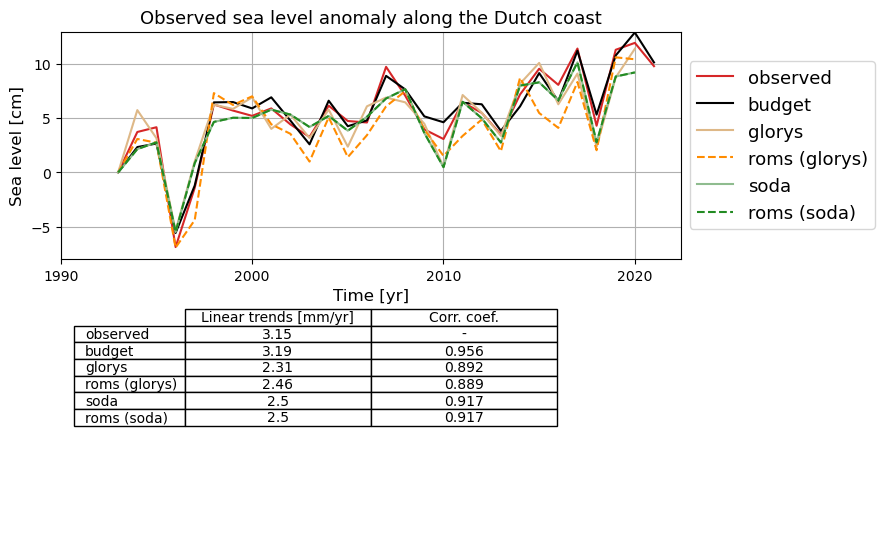

In [272]:
budget_tg_tot = budget_tg['Total'].values - budget_tg['Total'][1993]
budget_tg_obs = budget_tg['Obs'].values - budget_tg['Obs'][1993]

glorys_tg_obs = budget_tg_tot[:-1] - budget_tg_ocdyn[:-1] + glorys_tg_ocdyn
roms_glorys_tg_obs = budget_tg_tot[:-1] - budget_tg_ocdyn[:-1] + roms_glorys_tg_ocdyn
soda_tg_obs = budget_tg_tot[:-1] - budget_tg_ocdyn[:-1] + soda_tg_ocdyn[13:]
roms_soda_tg_obs = budget_tg_tot[:-1] - budget_tg_ocdyn[:-1] + roms_soda_tg_ocdyn[13:]



fig, axes = plt.subplots(2,1, figsize = (8,6.5))

ax = axes[0]

# Plot budget
ax.plot(budget_tg_time, budget_tg_obs, color = 'tab:red')
ax.plot(budget_tg_time, budget_tg_tot, color = 'k')

# Plot glorys output
ax.plot(glorys_tg_time, glorys_tg_obs, color = 'burlywood')
ax.plot(roms_glorys_tg_time, roms_glorys_tg_obs, '--', color = 'darkorange')


# Plot soda output
ax.plot(soda_tg_time[13:], soda_tg_obs, color = 'darkseagreen')
ax.plot(roms_soda_tg_time[13:], roms_soda_tg_obs, '--', color = 'forestgreen')


# Obtain linear trend
obs_trend = round(np.polyfit(budget_tg_time[:-1], budget_tg_obs[:-1]*10, 1)[0],2)
budget_trend = round(np.polyfit(budget_tg_time[:-1], budget_tg_tot[:-1]*10, 1)[0],2)
glorys_trend = round(np.polyfit(glorys_tg_time, glorys_tg_obs*10, 1)[0],2)
roms_glorys_trend = round(np.polyfit(roms_glorys_tg_time, roms_glorys_tg_obs*10, 1)[0],2)
soda_trend = round(np.polyfit(soda_tg_time[13:], soda_tg_obs*10, 1)[0],2)
roms_soda_trend = round(np.polyfit(roms_soda_tg_time[13:], roms_soda_tg_obs*10, 1)[0],2)

#ax.text(1980.1, -14, f'Linear trends (mm/yr):\nbudget = {budget_trend}\nglorys = {glorys_trend}\nroms (glorys) = {roms_glorys_trend}\nsoda = {soda_trend}\nroms (soda) = {roms_soda_trend}')


    
# Add plot settings  
ax.set_xlabel('Time [yr]', fontsize = 12)
ax.set_ylabel('Sea level [cm]', fontsize = 12)
ax.set_title(f'Observed sea level anomaly along the Dutch coast', fontsize = 13)
ax.set_xticks(range(1990, 2021, 10), fontsize = 12)
ax.set_ylim(-8,13)
ax.set_yticks([-5, 0, 5, 10], fontsize = 12)
ax.grid()

# Add label
labels=['observed', 'budget', 'glorys','roms (glorys)', 'soda', 'roms (soda)']
ax.legend(labels = labels, fontsize = 13, loc='center left', bbox_to_anchor=(1.0, 0.5))



# Detrend data
obs_dt = signal.detrend(budget_tg_obs[:-1])
budget_dt = signal.detrend(budget_tg_tot[:-1])
glorys_dt = signal.detrend(glorys_tg_obs)
roms_glorys_dt = signal.detrend(roms_glorys_tg_obs)
soda_dt = signal.detrend(soda_tg_obs)
roms_soda_dt = signal.detrend(roms_soda_tg_obs)


# Obtain correlations
r_budget = np.round(np.corrcoef(budget_dt, obs_dt)[0,1], 3)
r_glorys = np.round(np.corrcoef(glorys_dt, obs_dt)[0,1], 3)
r_roms_glorys = np.round(np.corrcoef(roms_glorys_dt, obs_dt)[0,1], 3)
r_soda = np.round(np.corrcoef(soda_dt, obs_dt)[0,1], 3)
r_roms_soda = np.round(np.corrcoef(roms_soda_dt, obs_dt)[0,1], 3)

axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
plt.box(on=None)

# Make table of linear trends and correlation coefficients
table_labels=['observed', 'budget','glorys','roms (glorys)', 'soda', 'roms (soda)']
the_secon_table = axes[1].table(cellText=[[str(obs_trend), '-'], [str(budget_trend), r_budget], [str(glorys_trend), r_glorys], [str(roms_glorys_trend), r_roms_glorys], [str(soda_trend), r_soda], [str(roms_soda_trend), r_roms_soda]],
                  colWidths = [0.3]*5,
                  cellLoc = 'center',
                  rowLabels=table_labels,
                  colLabels=['Linear trends [mm/yr]', 'Corr. coef.'],
                         loc = 'upper center')


    
plt.savefig(f'{path_fig}/obs_ocdyn_sealevel_tg', bbox_inches="tight")

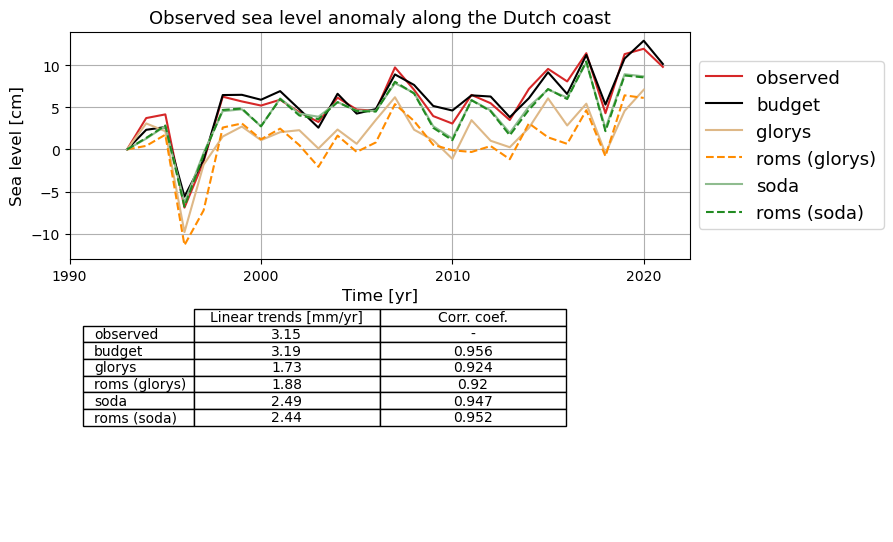

In [276]:
budget_tg_tot = budget_tg['Total'].values - budget_tg['Total'][1993]
budget_tg_obs = budget_tg['Obs'].values - budget_tg['Obs'][1993]

glorys_tg_obs = budget_tg_tot[:-1] - budget_tg_steric[:-1] + glorys_tg_steric
roms_glorys_tg_obs = budget_tg_tot[:-1] - budget_tg_steric[:-1] + roms_glorys_tg_steric
soda_tg_obs = budget_tg_tot[:-1] - budget_tg_steric[:-1] + soda_tg_steric[13:]
roms_soda_tg_obs = budget_tg_tot[:-1] - budget_tg_steric[:-1] + roms_soda_tg_steric[13:]


fig, axes = plt.subplots(2,1, figsize = (8,6.5))

ax = axes[0]

# Plot budget
ax.plot(budget_tg_time, budget_tg_obs, color = 'tab:red')
ax.plot(budget_tg_time, budget_tg_tot, color = 'k')

# Plot glorys output
ax.plot(glorys_tg_time, glorys_tg_obs, color = 'burlywood')
ax.plot(roms_glorys_tg_time, roms_glorys_tg_obs, '--', color = 'darkorange')


# Plot soda output
ax.plot(soda_tg_time[13:], soda_tg_obs, color = 'darkseagreen')
ax.plot(roms_soda_tg_time[13:], roms_soda_tg_obs, '--', color = 'forestgreen')


# Obtain linear trend
obs_trend = round(np.polyfit(budget_tg_time[:-1], budget_tg_obs[:-1]*10, 1)[0],2)
budget_trend = round(np.polyfit(budget_tg_time[:-1], budget_tg_tot[:-1]*10, 1)[0],2)
glorys_trend = round(np.polyfit(glorys_tg_time, glorys_tg_obs*10, 1)[0],2)
roms_glorys_trend = round(np.polyfit(roms_glorys_tg_time, roms_glorys_tg_obs*10, 1)[0],2)
soda_trend = round(np.polyfit(soda_tg_time[13:], soda_tg_obs*10, 1)[0],2)
roms_soda_trend = round(np.polyfit(roms_soda_tg_time[13:], roms_soda_tg_obs*10, 1)[0],2)

#ax.text(1980.1, -14, f'Linear trends (mm/yr):\nbudget = {budget_trend}\nglorys = {glorys_trend}\nroms (glorys) = {roms_glorys_trend}\nsoda = {soda_trend}\nroms (soda) = {roms_soda_trend}')


    
# Add plot settings  
ax.set_xlabel('Time [yr]', fontsize = 12)
ax.set_ylabel('Sea level [cm]', fontsize = 12)
ax.set_title(f'Observed sea level anomaly along the Dutch coast', fontsize = 13)
ax.set_xticks(range(1990, 2021, 10), fontsize = 12)
ax.set_ylim(-13,14)
ax.set_yticks([-10, -5, 0, 5, 10], fontsize = 12)
ax.grid()

# Add label
labels=['observed', 'budget', 'glorys','roms (glorys)', 'soda', 'roms (soda)']
ax.legend(labels = labels, fontsize = 13, loc='center left', bbox_to_anchor=(1.0, 0.5))



# Detrend data
obs_dt = signal.detrend(budget_tg_obs[:-1])
budget_dt = signal.detrend(budget_tg_tot[:-1])
glorys_dt = signal.detrend(glorys_tg_obs)
roms_glorys_dt = signal.detrend(roms_glorys_tg_obs)
soda_dt = signal.detrend(soda_tg_obs)
roms_soda_dt = signal.detrend(roms_soda_tg_obs)


# Obtain correlations
r_budget = np.round(np.corrcoef(budget_dt, obs_dt)[0,1], 3)
r_glorys = np.round(np.corrcoef(glorys_dt, obs_dt)[0,1], 3)
r_roms_glorys = np.round(np.corrcoef(roms_glorys_dt, obs_dt)[0,1], 3)
r_soda = np.round(np.corrcoef(soda_dt, obs_dt)[0,1], 3)
r_roms_soda = np.round(np.corrcoef(roms_soda_dt, obs_dt)[0,1], 3)

axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
plt.box(on=None)

# Make table of linear trends and correlation coefficients
table_labels=['observed', 'budget','glorys','roms (glorys)', 'soda', 'roms (soda)']
the_secon_table = axes[1].table(cellText=[[str(obs_trend), '-'], [str(budget_trend), r_budget], [str(glorys_trend), r_glorys], [str(roms_glorys_trend), r_roms_glorys], [str(soda_trend), r_soda], [str(roms_soda_trend), r_roms_soda]],
                  colWidths = [0.3]*5,
                  cellLoc = 'center',
                  rowLabels=table_labels,
                  colLabels=['Linear trends [mm/yr]', 'Corr. coef.'],
                         loc = 'upper center')


    
plt.savefig(f'{path_fig}/obs_ster_sealevel_tg', bbox_inches="tight")

# Sea level for polygon

In [238]:
glorys_poly_ocdyn = 
glorys_poly_wind = 
glorys_poly_steric = glorys_poly_ocdyn - glorys_poly_wind

glorys_tg_time = 

SyntaxError: invalid syntax (2691331010.py, line 1)

In [ ]:
roms_glorys_poly_ocdyn = 
roms_glorys_poly_wind = 
roms_glorys_poly_steric = roms_glorys_poly_ocdyn - roms_glorys_poly_wind

roms_glorys_tg_time = 

In [ ]:
soda_poly_ocdyn = 
glorys_poly_wind = 
glorys_poly_steric = glorys_poly_ocdyn - glorys_poly_wind

glorys_tg_time = 

In [ ]:
budget_poly = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/budget/slbudget_2022_12_01_NL_region_altimetry_1993_2021_ERA5_StericEN4_22_[500, 4000]m.csv', index_col = 'time')

# Sea level averaged over NWES